# Step 1. 인물모드 직접 해보기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

### 사진 1

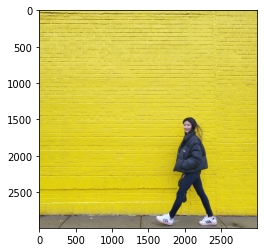

In [2]:
# image load
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/1.png'  
img_orig1 = cv2.imread(img_path1) 
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# PixeLib 제공 모델 다운로드
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f71e5607310>)

In [4]:
# segmentation 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
# segmentAsPascalvoc()함수 호출 하여 입력된 이미지 분할
segvalues1, output1=model.segmentAsPascalvoc(img_path1)
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

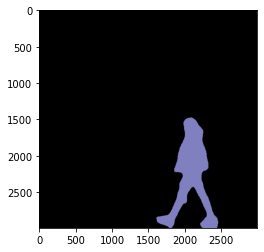

In [5]:
plt.imshow(output1)
plt.show()

In [6]:
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [7]:
# 물체마다 output에 어떤 색상으로 나타내는지 확인
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [8]:
# 사람 나타내는 15번째 색상 BGR 확인
colormap[15]

array([192, 128, 128])

(2992, 2992)


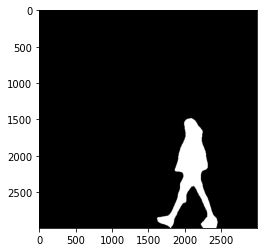

In [9]:
# RGB로 변경
seg_color = (128,128,192)

# seg_color로만 이루어진 마스크 생성
seg_map1 = np.all(output1==seg_color, axis=-1)
print(seg_map1.shape)
plt.imshow(seg_map1, cmap='gray')
plt.show()

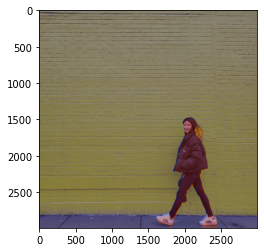

In [10]:
# 마스크랑 원본 이미지 합쳐보기
img_show = img_orig1.copy()
img_mask = seg_map1.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

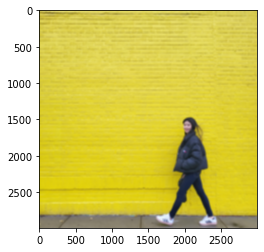

In [11]:
# 배경 blur 처리
img_orig_blur = cv2.blur(img_orig1, (30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

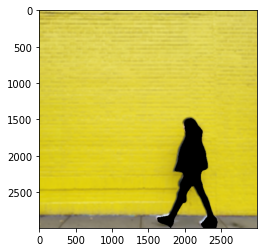

In [12]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

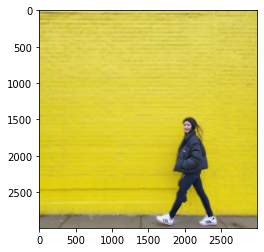

In [13]:
# 흐린 배경과 원본 이미지 합성
img_concat = np.where(img_mask_color==255, img_orig1, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

__background 이미지 로드__

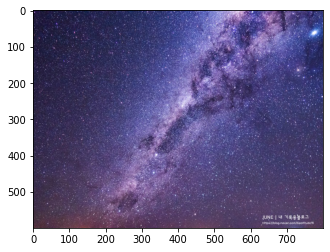

In [14]:
# image load
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/bg.png'  
img_bg = cv2.imread(img_path2) 
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()

__기존 이미지와 사이즈 맞춰주기__

In [15]:
img_orig1.shape

(2992, 2992, 3)

In [16]:
img_bg.shape

(600, 800, 3)

In [17]:
img_bg_resize = cv2.resize(img_bg,(2992,2992))
img_bg_resize.shape

(2992, 2992, 3)

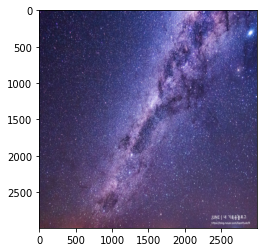

In [18]:
plt.imshow(cv2.cvtColor(img_bg_resize, cv2.COLOR_BGR2RGB))
plt.show()

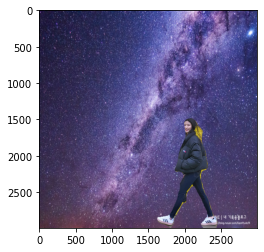

In [20]:
# 우주 배경과 원본 이미지 합성
img_concat2 = np.where(img_mask_color==255, img_orig1, img_bg_resize)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

### 사진 2

LMS 커널이 계속 죽고 모듈이 로컬에 설치가 안돼서 사진 2와 3 따로 만들었습니다...ㅜㅜ<br>
[링크_사진2](https://github.com/LubyJ/LubyJ/blob/master/%5BEP09%5D_2nd%20PIC.ipynb)

### 사진 3
[링크_사진3](https://github.com/LubyJ/LubyJ/blob/master/%5BEP09%5D_3rd%20PIC.ipynb)

## Step 2. 사진에서 문제점 찾기
1. 사진 1
    * 벽, 바닥, 사람이 있는 사진에서 사람만 잘 골라냄.
    * 그러나, 머리카락이 날리는 부분은 세밀하게 구별하지 못하고 뒷 배경인 벽이 함께 포함된 것을 볼 수 있음.
    * 또한, 뒷 배경을 변경했을 때, 기존 노란색 벽이 사람 모양에 테두리로 같이 보임
2. 사진 2
    * semantic segmentation 결과 이미지를 보면 사람, 테이블, 병, 다리, 술잔은 잘 구분해낸 것을 볼 수 있음.
    * 그러나, 뒤에 사람이 겹쳐진 경우, 내가 원하는 피사체만을 선택할 수 없다는 문제점이 있음.
3. 사진 3
    * 서있는 고양이 사진을 골랐는데도 고양이로 잘 분류해 내고 잘 보이지 않는 꼬리까지 고양이에 잘 포함시킨것을 볼 수 있음. 해당 사진에서는 문제점이 없음 

## Step 3. 해결 방법을 제안해 보기
1. 사진 1 : 내가 원하는 피사체를 정교하게 감지하는 방법은?
    * Instance segmentation: 이미지에서 개체의 범주만 식별하는 시맨틱 분할과 달리 인스턴스 분할은 사람을 포함하여 개별 개체를 개별적으로 식별하고 각각에 고유한 레이블을 할당할 수 있음. 이렇게 하면 이미지의 배경을 변경할 때 새 배경이 주변 윤곽이나 잔여물 없이 개체 자체에만 적용됨.

    * 딥 러닝 모델: CNN(컨볼루션 신경망)과 같은 딥 러닝 모델을 사용하여 사람을 더 정확하게 감지하도록 모델을 훈련할 수도 있음. Mask R-CNN, U-Net 및 DeepLab과 같은 객체 감지 및 의미 체계 분할 작업을 위해 특별히 설계된 CNN의 다양한 아키텍처가 있음.

    * Fine-tuning pre-trained models: ImageNet과 같은 대규모 데이터 세트에서 훈련된 사전 훈련된 모델을 사용하고 사람이 포함된 자체 이미지 데이터 세트에서 미세 조정할 수 있음. 이를 통해 모델은 사람의 특정 기능에 대해 더 많이 배우고 이를 감지하는 정확도를 향상시킬 수 있음.

    * Data augmentation: 데이터 집합의 다양성을 높이고 과적합을 방지하기 위해 임의 자르기, 뒤집기 및 회전과 같은 다양한 데이터 확대 기술을 사용할 수 있음. 이렇게 하면 모델이 다른 조건에서 사람을 감지하는 정확도를 높이고 일반화하는 데 도움이 됨.

    * Post-processing: 초기 segmentation 이후 형태학적 작업 및 가장자리 감지와 같은 사후 처리 기술을 사용하여 개체의 경계를 구체화하고 원치 않는 외곽선이나 다른 형체를 제거할 수 있음.

2. 사진 2 : 피사체가 겹쳐져있을 때, 내가 원하는 하나의 피사체만 선별하여 감지하는 방법은?
    * 인스턴스 분할(instance segmentation)을 사용하면 사람을 포함한 각 개체를 개별적으로 식별하고 각 개체에 고유한 레이블을 할당할 수 있음. 그런 다음 상대방에 해당하는 레이블을 필터링하고 나에게 해당하는 레이블만 유지할 수 있음.

    * 구현 방법은?
        * 인스턴스 분할 모델을 사용하여 이미지를 분할하고 사람을 포함하여 그 안의 개별 개체를 식별.
        * 각 개체에 대해 고유한 레이블(예: ID 번호 또는 이름)을 할당.
        * 수동으로 옷이나 얼굴 특징과 같은 특정 기능을 기반으로 사람을 인식할 수 있는 물체 감지 알고리즘을 사용하여 다른 피사체에 해당하는 레이블을 식별.
        * 다른 피사체에 해당하는 레이블을 필터링하고 target 피사체의 레이블만 유지.
        * 마지막으로 위에서 언급한 post-processing techniques(형태학적 작업 또는 가장자리 감지 등)을 적용하여 개체의 경계를 구체화하고 세분화를 더 정확하게 만들 수 있음.

    * 인스턴스 분할 모델의 정확도에 영향을 끼치는 요인
        * 이미지 품질, 조명 조건 및 피사체 간의 유사성과 같은 다양한 요인에 따라 달라짐.
        * 따라서 고품질 이미지를 사용하고 다양한 시나리오에서 모델을 테스트하여 정확성을 보장하는 것이 중요.